# Seaborn

* statistical plotting library
* built-in default styles
* desgined to work with pandas DataFrames
* built-in data sets

<br>

* argument `aspect=`: adjust aspect ratio of figure
* argument `height=`: adjust size of figure

In [1]:
import seaborn as sns
import matplotlib as plt
import numpy as np
%matplotlib inline

## Distribution Plots

### Distribution Plot
`.displot(data=, x=, {kind=})`
* shows the distribution of a univariate (one variable) set of observations
* mixture of matplotlib `hist` function (with automatic calculation of a good default bin size) with the seaborn `kdeplot` function (`kdeplot` plots a kernel density estimate, which is an estimation of the probability density function of a random variable that produced the data sample).
* argument:`kind=`
    * `hist`: histogram plot (default)
    * `kde`: kernel density estimation, <br> probability density function of the variable by smoothing the histogram
    * `ecdf`: empirical cumulative distribution function (ECDF) plot <br> display the empirical cumulative distribution of the data, which represents the proportion of data points that are less than or equal to a given value
 
### Joint Plot
`.jointplot(data=, x=, y=, kind=)`

* match up two distplots for bivariate data
* choice of what `kind=` parameter to compare with:
    * `scatter`: scatter plot, joint distribution
    * `reg`: scatter plot with fitted linear regression line
    * `resid`: residual plot against independent variable (to check homoscedasticity)
    * `kde`: 2-D kernel density estimation 
    * `hex`: hexbin plot, to viualize density


### Pair Plot
`.pairplot()`

* plots pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns)
* does not consider boolean, strings, etc.
* `hue=` argument: categorical variable, so each category displayed in a different hue
* `palette=`argument: color palette


### Rug Plot
`.rugplot()`

### KDE Plot
`.kdeplot()`

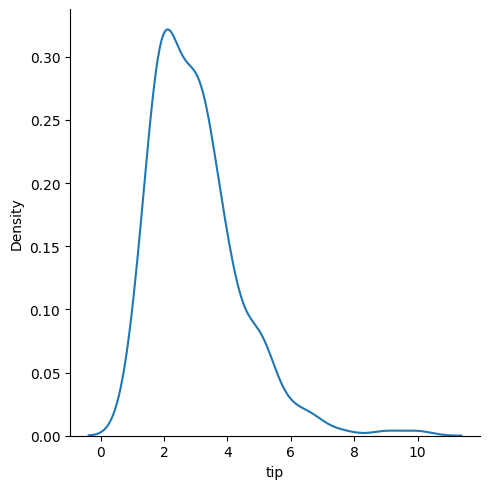

In [2]:
# sample data set
tips = sns.load_dataset('tips')

# displot, kde
sns.displot(data=tips, x='tip', kind='kde')

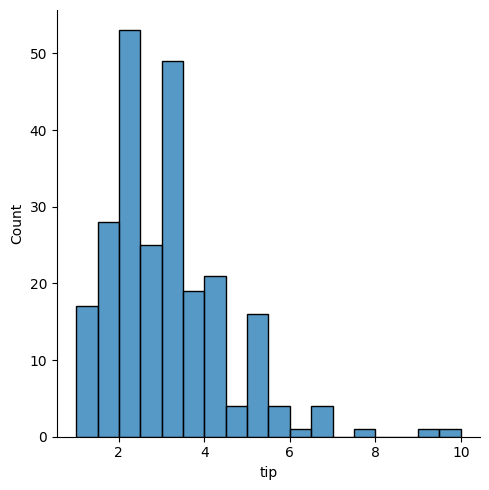

In [4]:
# displot, hist
sns.displot(data=tips, x='tip')

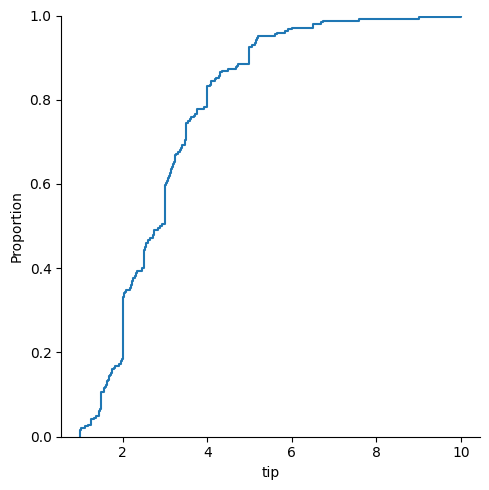

In [5]:
# displot, kde
sns.displot(data=tips, x='tip', kind='ecdf')

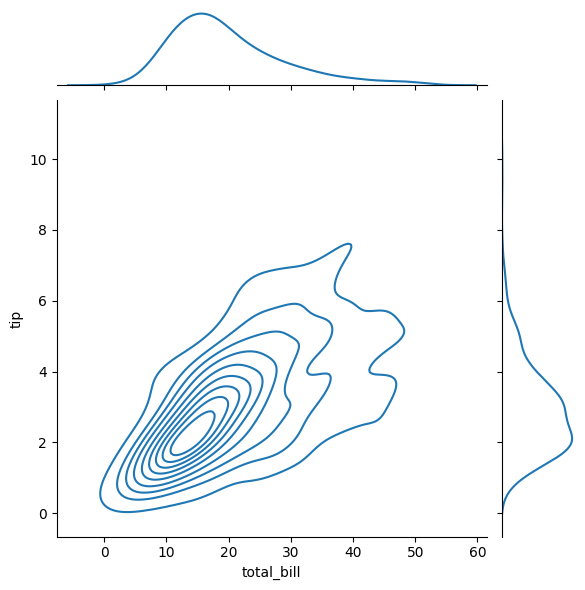

In [6]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')

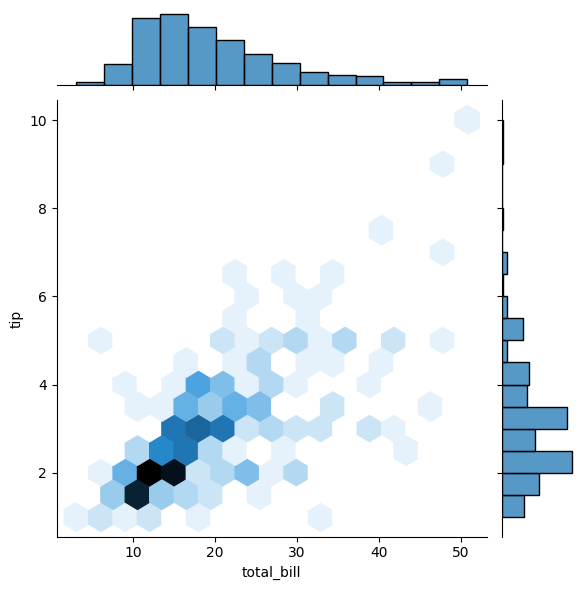

In [12]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

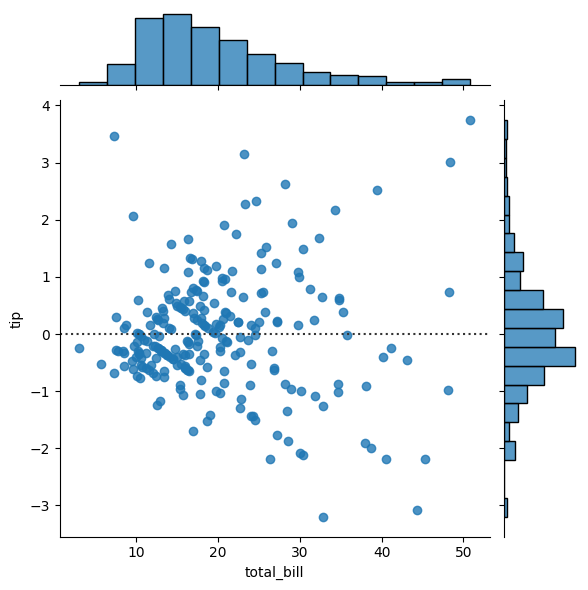

In [14]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid')

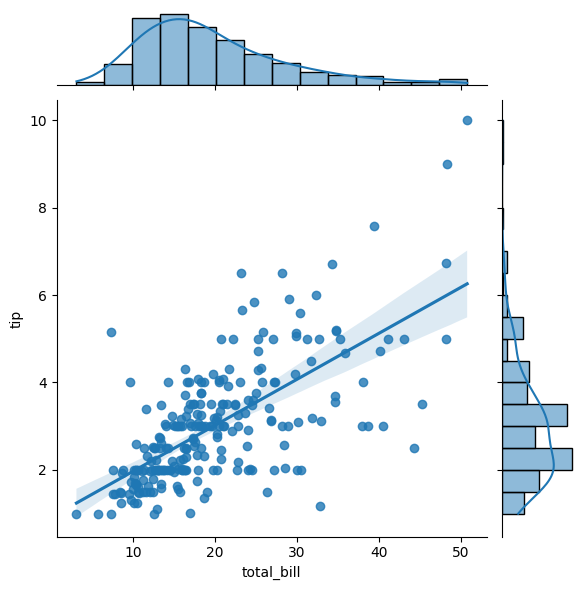

In [9]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

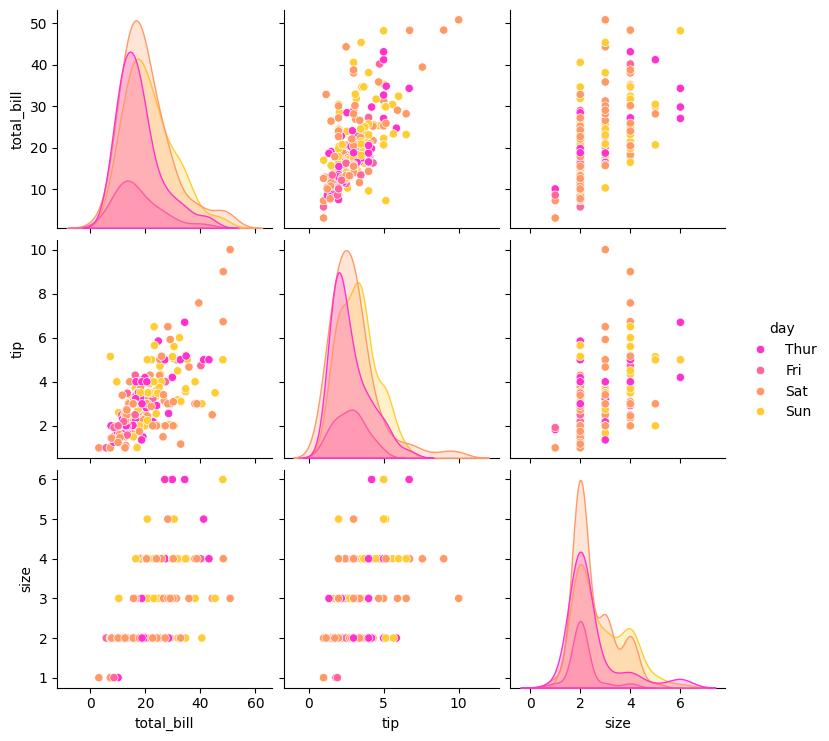

In [18]:
sns.pairplot(tips, hue='day', palette='spring')

## Categorical Plots

* argument `estimator=`: allows you to specify a function that aggregates the data within each category before plotting
    * `np.mean`: *default*
    * `np.median`
    * `np.sum`
    * `np.max`
    * `np.min`
    * *custom function*
* argument `errorbar=`: controls the display of error bars on the plot, indicating the uncertainty or variability of the data
    * `('ci', 95)`: 95% confidence interval
    * `('boot')`: bootstrapped confidence intervals
    * `('sd')`: standard deviation
* argument `palette=`
* argument `hue=`

### Bar Plot
`.barplot(data=, x=, y=)`
* to get aggregate data off a categorical feature or a numerical variable
* displaying the counts or frequencies of each category as bars
* represents an estimate of central tendency for a numeric variable with the height of each rectangle
* provides some indication of the uncertainty around that estimate using error bars
* include zero in quantitative axis range
    * good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it


### Count Plot
`.countplot(data=, x=)`
* to get aggregate data off a categorical feature
* essentially the same as barplot except the estimator is **explicitly counting the number of occurrences**
* **Only pass the x value!**

### Boxplot
`.boxplot(data=, x=, y=)`
* to shown the distribution of categorical data
* shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable
* box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range
* argument `orient=`: orientation of boxplot (`h` for horizontal)

/var/folders/dp/xjkh2hmd75l5n7n96tm19qqm0000gn/T/ipykernel_2117/3534350762.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day').total_bill.describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


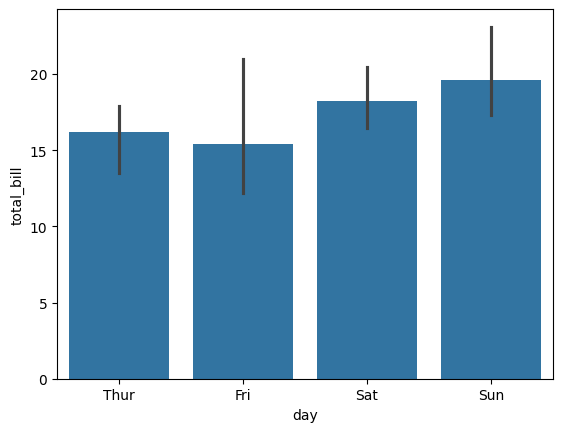

In [21]:
sns.barplot(x='day', 
            y='total_bill', 
            data=tips, 
            estimator=np.median)

tips.groupby('day').total_bill.describe()

<Axes: xlabel='day', ylabel='count'>

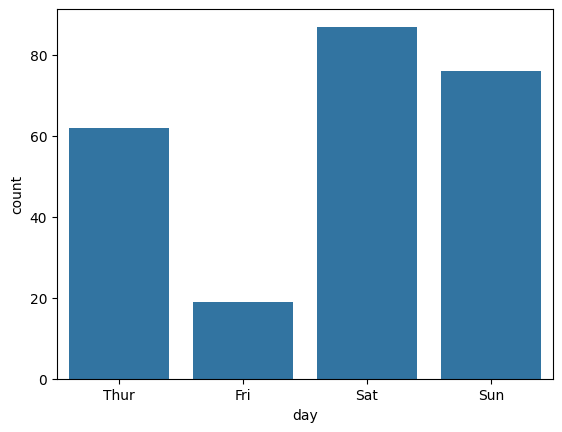

In [22]:
sns.countplot(x='day', data = tips)

<Axes: xlabel='day', ylabel='total_bill'>

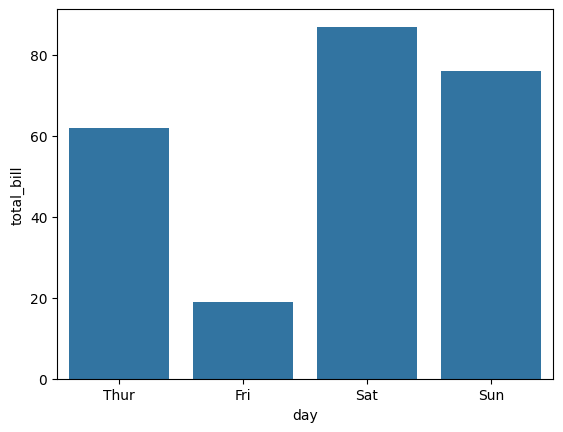

In [24]:
sns.barplot(data=tips, 
            x='day', 
            y='total_bill',
            estimator=np.count_nonzero, 
            errorbar=('ci', 95))


/var/folders/dp/xjkh2hmd75l5n7n96tm19qqm0000gn/T/ipykernel_2117/1719746347.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day",


<Axes: xlabel='day', ylabel='total_bill'>

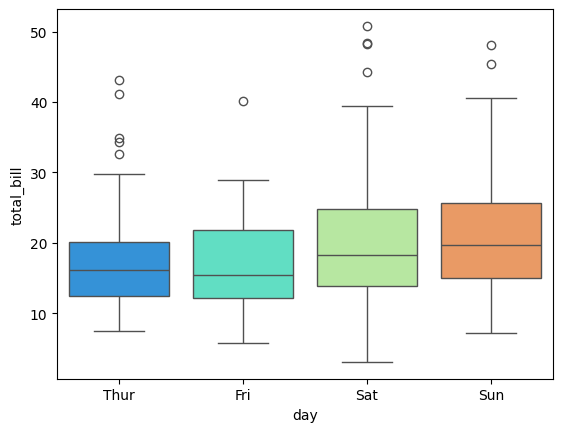

In [29]:
sns.boxplot(x="day", 
            y="total_bill", 
            data=tips, 
            palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

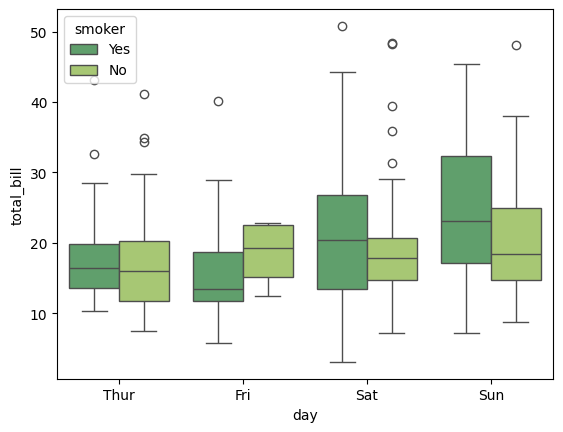

In [27]:
sns.boxplot(x="day", 
            y="total_bill", 
            hue="smoker", 
            data=tips, 
            palette="summer", 
            orient ='v')

<Axes: >

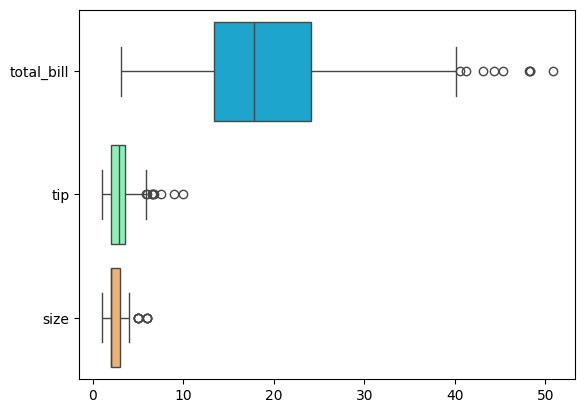

In [30]:
sns.boxplot(data=tips, palette='rainbow', orient='h')

## Matrix Plots
* allow to plot data as color-encoded matrices
* can be used to indicate clusters within the data

### Heatmap

`.heatmap(matrix, cmap=, annot=)`

* **data should be in matrix** form, e.g. correlation matrix
* argument `cmap=`: color map (viridis, plasma, magma, inferno, etc.)
* argument `annot=`: annotates the cells
* argument `linecolor=`: linecolor around heatmap cubes
* argument `linewidth=`: thickness of lines around heatmap cubes
* argument `alpha=`: opacity


<Axes: xlabel='year', ylabel='month'>

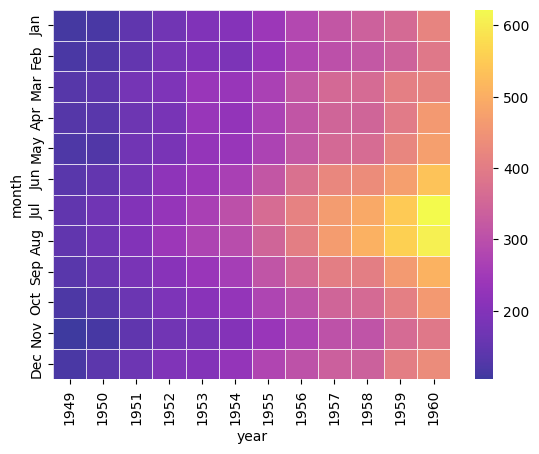

In [35]:
flights = sns.load_dataset('flights')
flights.pivot_table(values='passengers', index='month', columns='year')
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')

sns.heatmap(pvflights, 
            cmap ='plasma', 
            linecolor= 'white',
            linewidth='0.6',
            alpha= 0.8)

<Axes: >

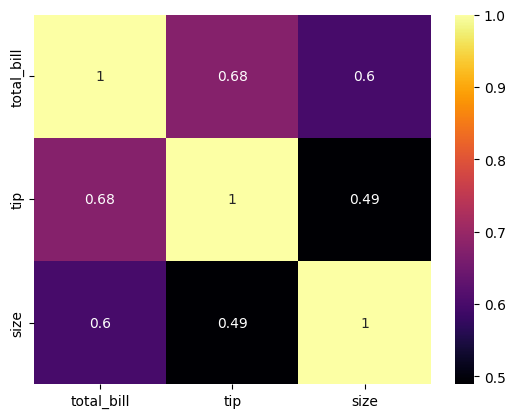

In [32]:
sns.heatmap(tips[['total_bill', 'tip', 'size']].corr(), cmap='inferno', annot=True)

## Regression Plots

### Linear Model Plot
`.lmplot()`

* designed for fitting and visualizing regression models
* particularly useful when you want to visualize the relationship between two variables and how it may vary across different subsets of the data
* can display multiple regression plots in a single figure, each corresponding to a different subset of the data defined by categorical variables
* adds a linear regression line to each plot, along with a confidence interval around the regression line
* higher-level function
* **Main Difference**: x and y variables must be specified as strings
* allows exploring interactions with up to three additional categorical variables
    * with `hue=`argument
* use `row=` and `col=` arguments to create grid of plots based on categorical variables
    * creates separate subplots for each unique combination

### Regression Plot
`.regplot()`

* lower-level function
* specifically designed for creating scatterplots with regression lines
* more basic than `.lmplot()`
* creates a single regression plot at a time, showing the relationship between two variables along with the fitted regression line
* useful for quickly visualizing the relationship between two variables and examining the linear trend between them
* more flexibility in customizing the appearance of the plot, such as specifying marker style, line style, and confidence intervals
* **Main Difference**: accepts x and y variables in different formats (e.g. numpy array, pandas Series, references to variables in pandas DataFrame)



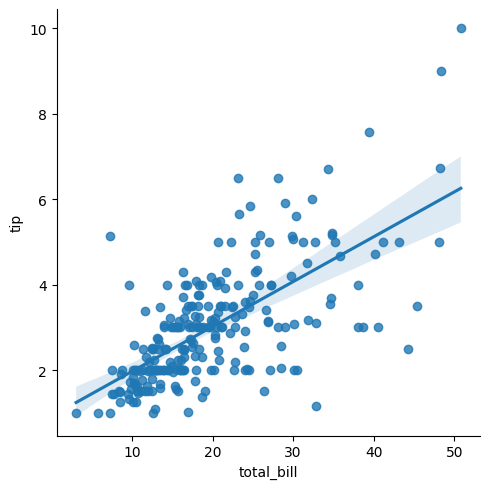

In [39]:
sns.lmplot(x='total_bill', y='tip', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

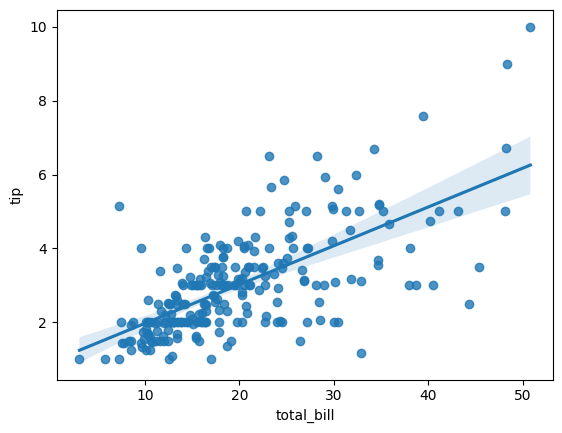

In [40]:
# alternative notation, without specifying data
sns.regplot(x=tips['total_bill'], y=tips['tip'])

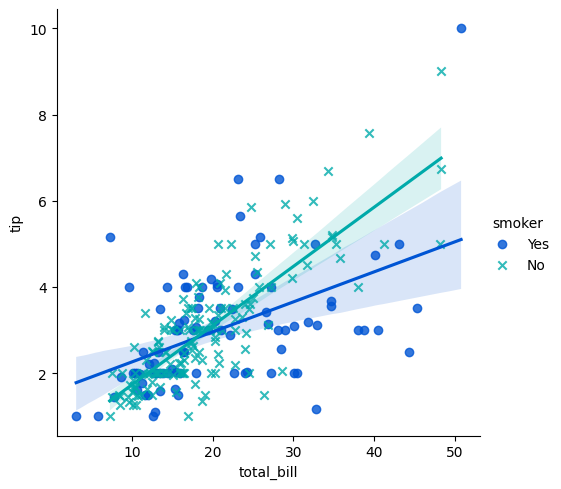

In [45]:
sns.lmplot(data = tips,
           x = 'total_bill',
           y = 'tip', 
           hue ='smoker', 
           palette = 'winter',
           markers = ['o', 'x'])

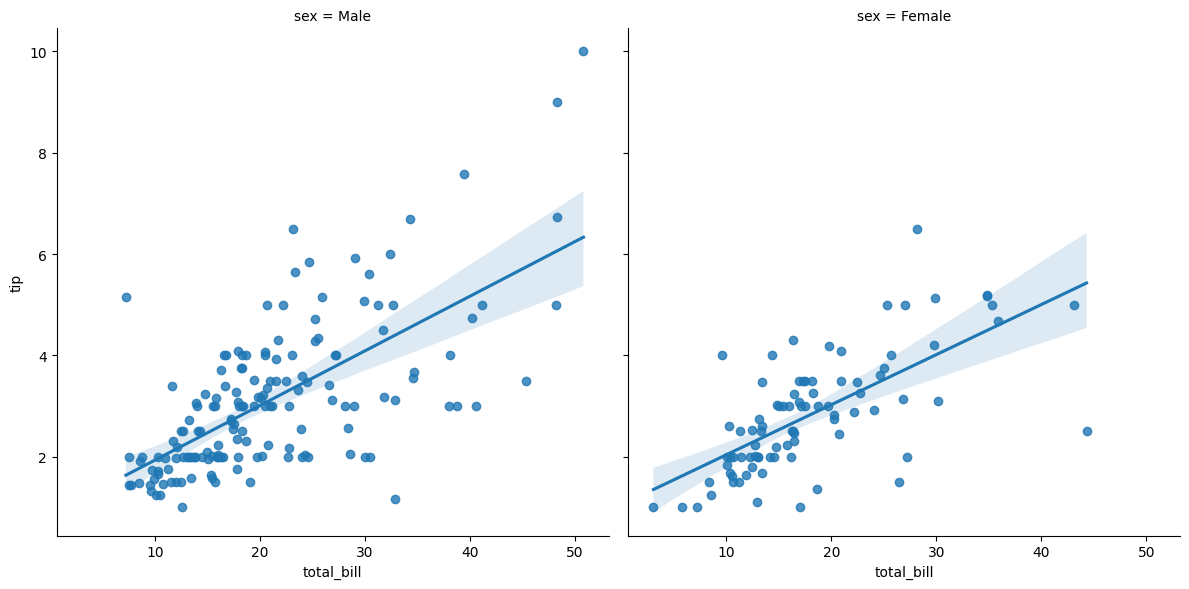

In [56]:
sns.lmplot(data = tips,
          x = 'total_bill',
          y = 'tip',
          aspect = 1,
          height = 6,
          col = 'sex')  # add extra scatter plot for each characteristic of category


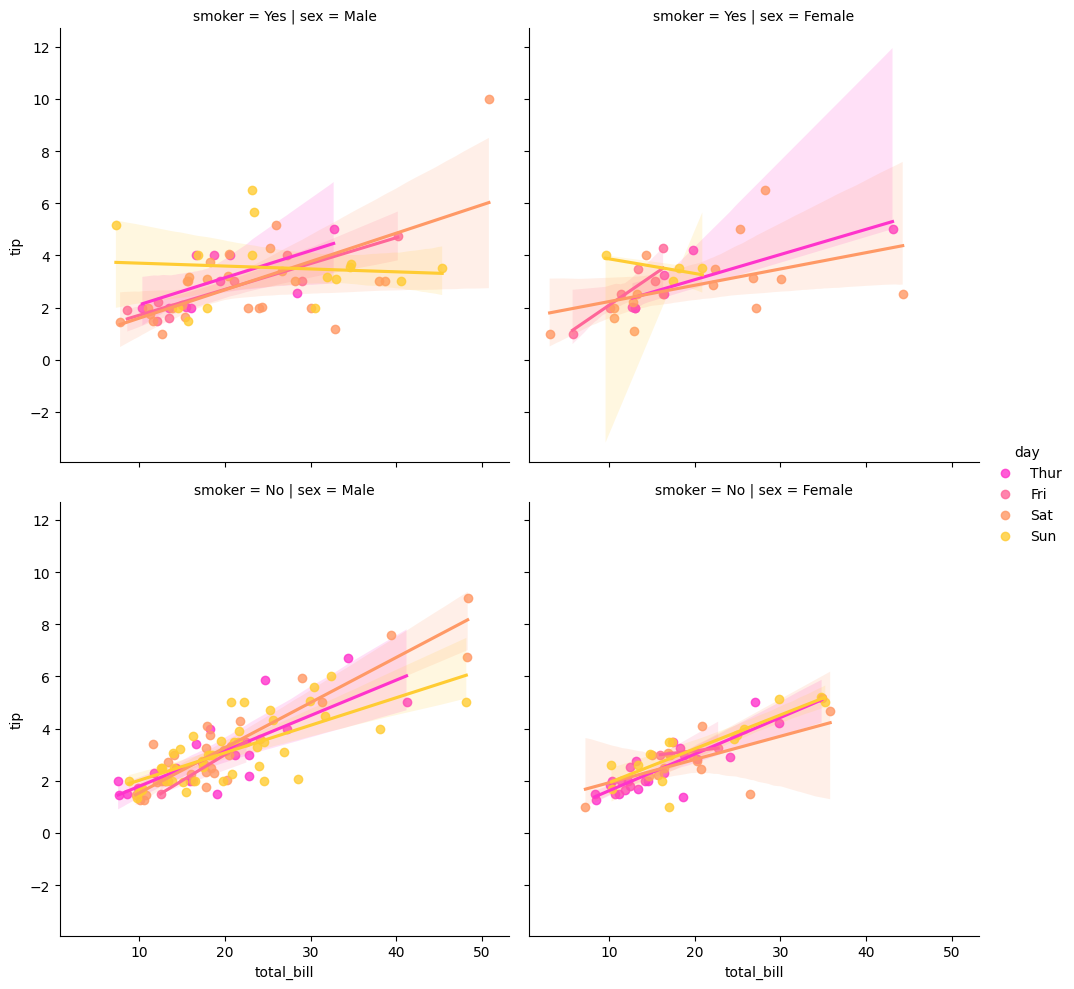

In [51]:
sns.lmplot(data = tips,
          x ='total_bill',
          y = 'tip',
          row = 'smoker',
          col = 'sex',
          hue = 'day',
          palette = 'spring',
          height = 5) # specifies height of each subplot